In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
bsi_m = "BSI_month.csv"
df_BSI_m = pd.read_csv(bsi_m, encoding = "cp949")
df_BSI = df_BSI_m.dropna(axis=1)

In [29]:
def mean(x):
    return sum(x)/len(x)

In [30]:
df_BSI["의류"] = pd.to_numeric(df_BSI["의류"])
df_BSI["음식점"] = pd.to_numeric(df_BSI["음식점"])
df_BSI["오락, 스포츠 서비스업"] = pd.to_numeric(df_BSI["오락, 스포츠 서비스업"])

df_BSI["평균"] = round(mean([df_BSI["음식점"], df_BSI["의류"], df_BSI["오락, 스포츠 서비스업"]]),2)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [31]:
df_BSI

,월,의류,음식점,"오락, 스포츠 서비스업",평균
0,2019-06,55.4,55.7,57.6,56.23
1,2019-07,46.7,48.6,59.2,51.50
2,2019-08,34.4,43.2,61.5,46.37
3,2019-09,73.1,80.4,72.4,75.30
4,2019-10,67.7,80.1,67.8,71.87
5,2019-11,79.0,64.5,56.6,66.70
6,2019-12,52.6,67.3,62.5,60.80
7,2020-01,51.0,62.4,62.0,58.47
8,2020-02,19.6,23.9,35.8,26.43
9,2020-03,23.1,30.7,22.5,25.43


In [50]:
csi= "CSI.csv"

df_csi = pd.read_csv(csi, encoding = "cp949")

In [51]:
df_csi = df_csi[df_csi['분류코드별'] == '전체']
df_csi = df_csi.loc[[220, 198, 308]]
df_csi = df_csi.T
df_csi = df_csi.drop('지수코드별',0)
df_csi = df_csi.drop('분류코드별', 0)

In [52]:
df_csi.columns = ['외식비', '의류비', '오락 문화생활비']
df_csi["의류비"] = pd.to_numeric(df_csi["의류비"])
df_csi["외식비"] = pd.to_numeric(df_csi["외식비"])
df_csi["오락 문화생활비"] = pd.to_numeric(df_csi["오락 문화생활비"])

df_csi["평균"] = round(mean([df_csi['외식비'], df_csi['의류비'], df_csi['오락 문화생활비']]),2)

In [55]:
for i in range(1,6):
    df_csi = df_csi.drop(index = '2019. 0'+str(i))

df_csi

,외식비,의류비,오락 문화생활비,평균
2019. 06,90.0,96.0,92.0,92.67
2019. 07,91.0,94.0,90.0,91.67
2019. 08,90.0,93.0,90.0,91.00
2019. 09,89.0,96.0,89.0,91.33
2019. 10,91.0,99.0,90.0,93.33
2019. 11,91.0,98.0,90.0,93.00
2019. 12,92.0,98.0,91.0,93.67
2020. 01,92.0,96.0,91.0,93.00
2020. 02,89.0,95.0,88.0,90.67
2020. 03,77.0,86.0,77.0,80.00


In [56]:
t = pd.Series(list(df_csi['평균']))
t.corr(df_BSI['평균']) # BSI 평균과 CSI 평균의 correlation

-0.20191741209117392

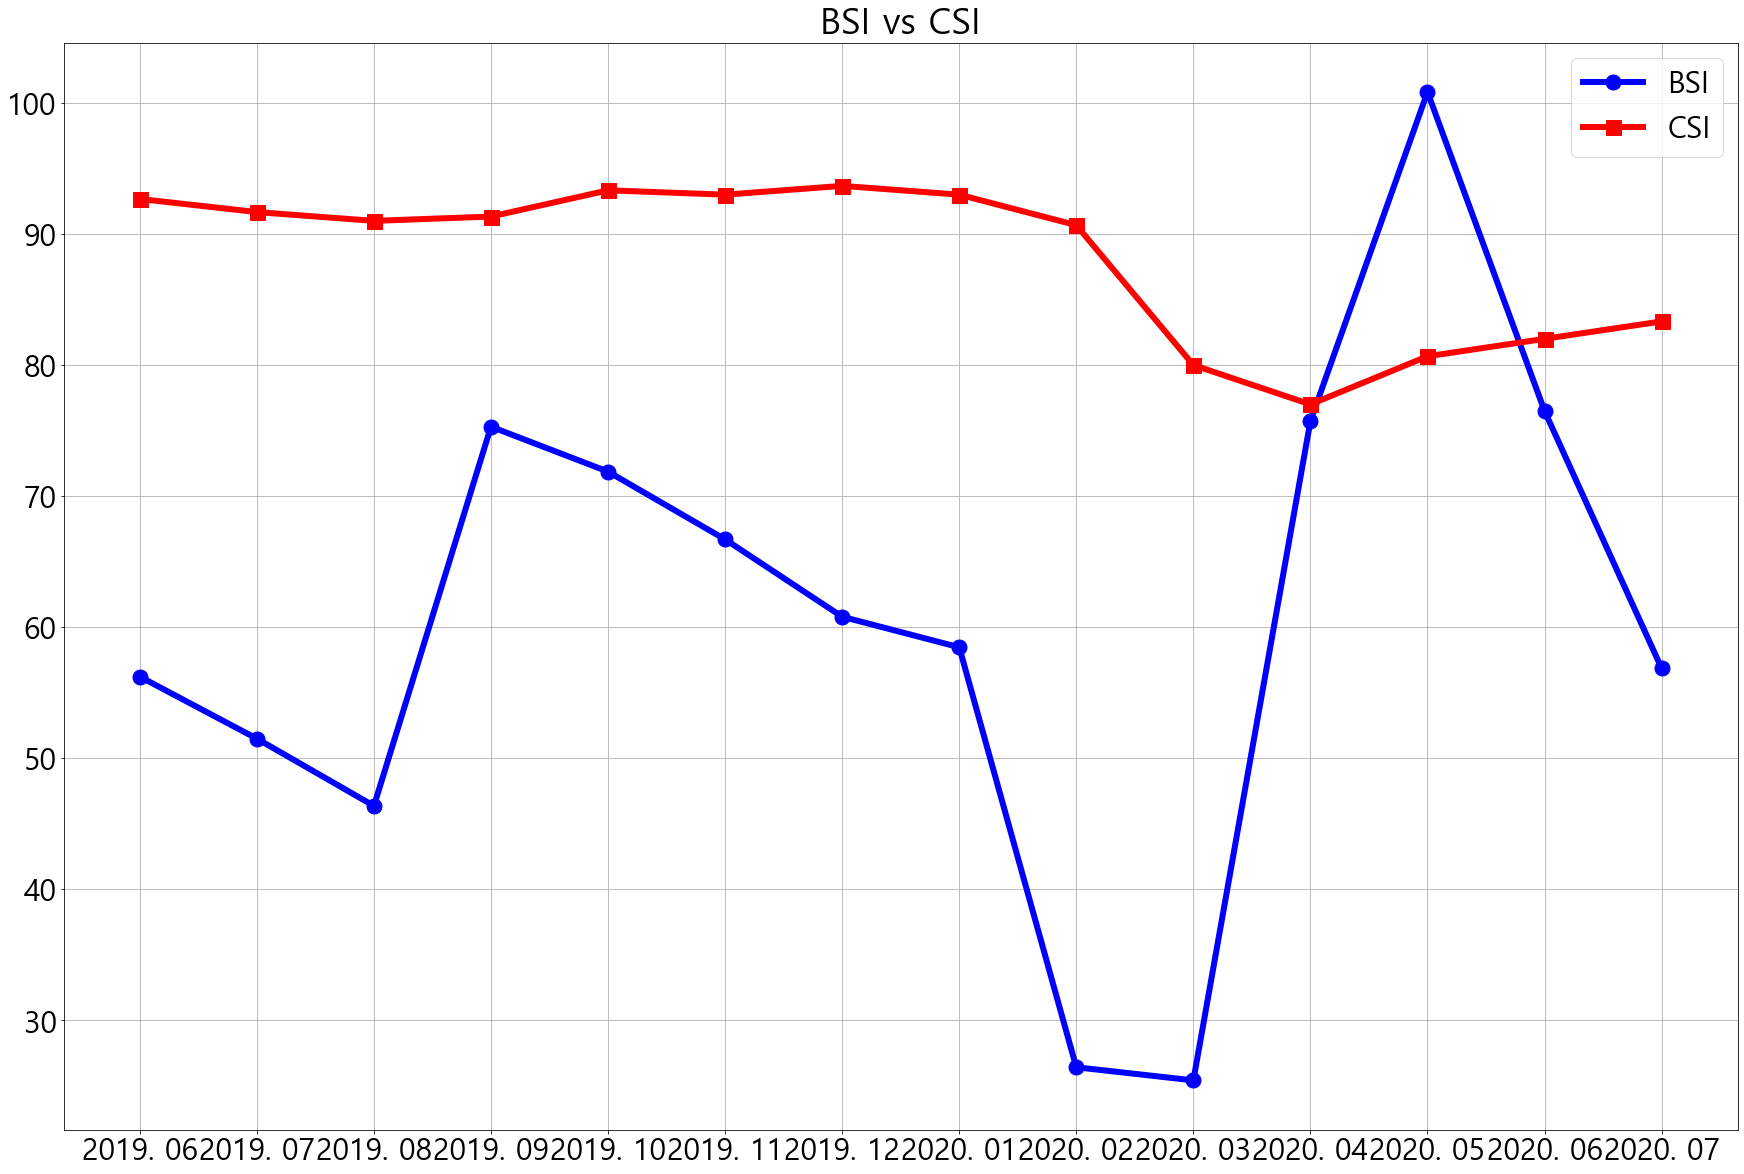

In [37]:
plt.plot(df_BSI['평균'], color='b', label='BSI', marker='o', markersize=15, linewidth = 6)
plt.plot(df_csi['평균'], color='r', label= 'CSI', marker='s', markersize=15, linewidth = 6)
plt.rcParams["font.size"]=30
plt.grid()
plt.legend()
plt.title("BSI vs CSI")
plt.show()

In [18]:
df_card = pd.read_csv("card.csv", encoding = "cp949")
df_card

,period,2019,2020
0,3월,2437,2244
1,4월,2412,2900
2,5월 1주,2661,2705
3,5월 2주,2440,3355
4,5월 3주,2776,3364
5,5월 4주,2379,3243


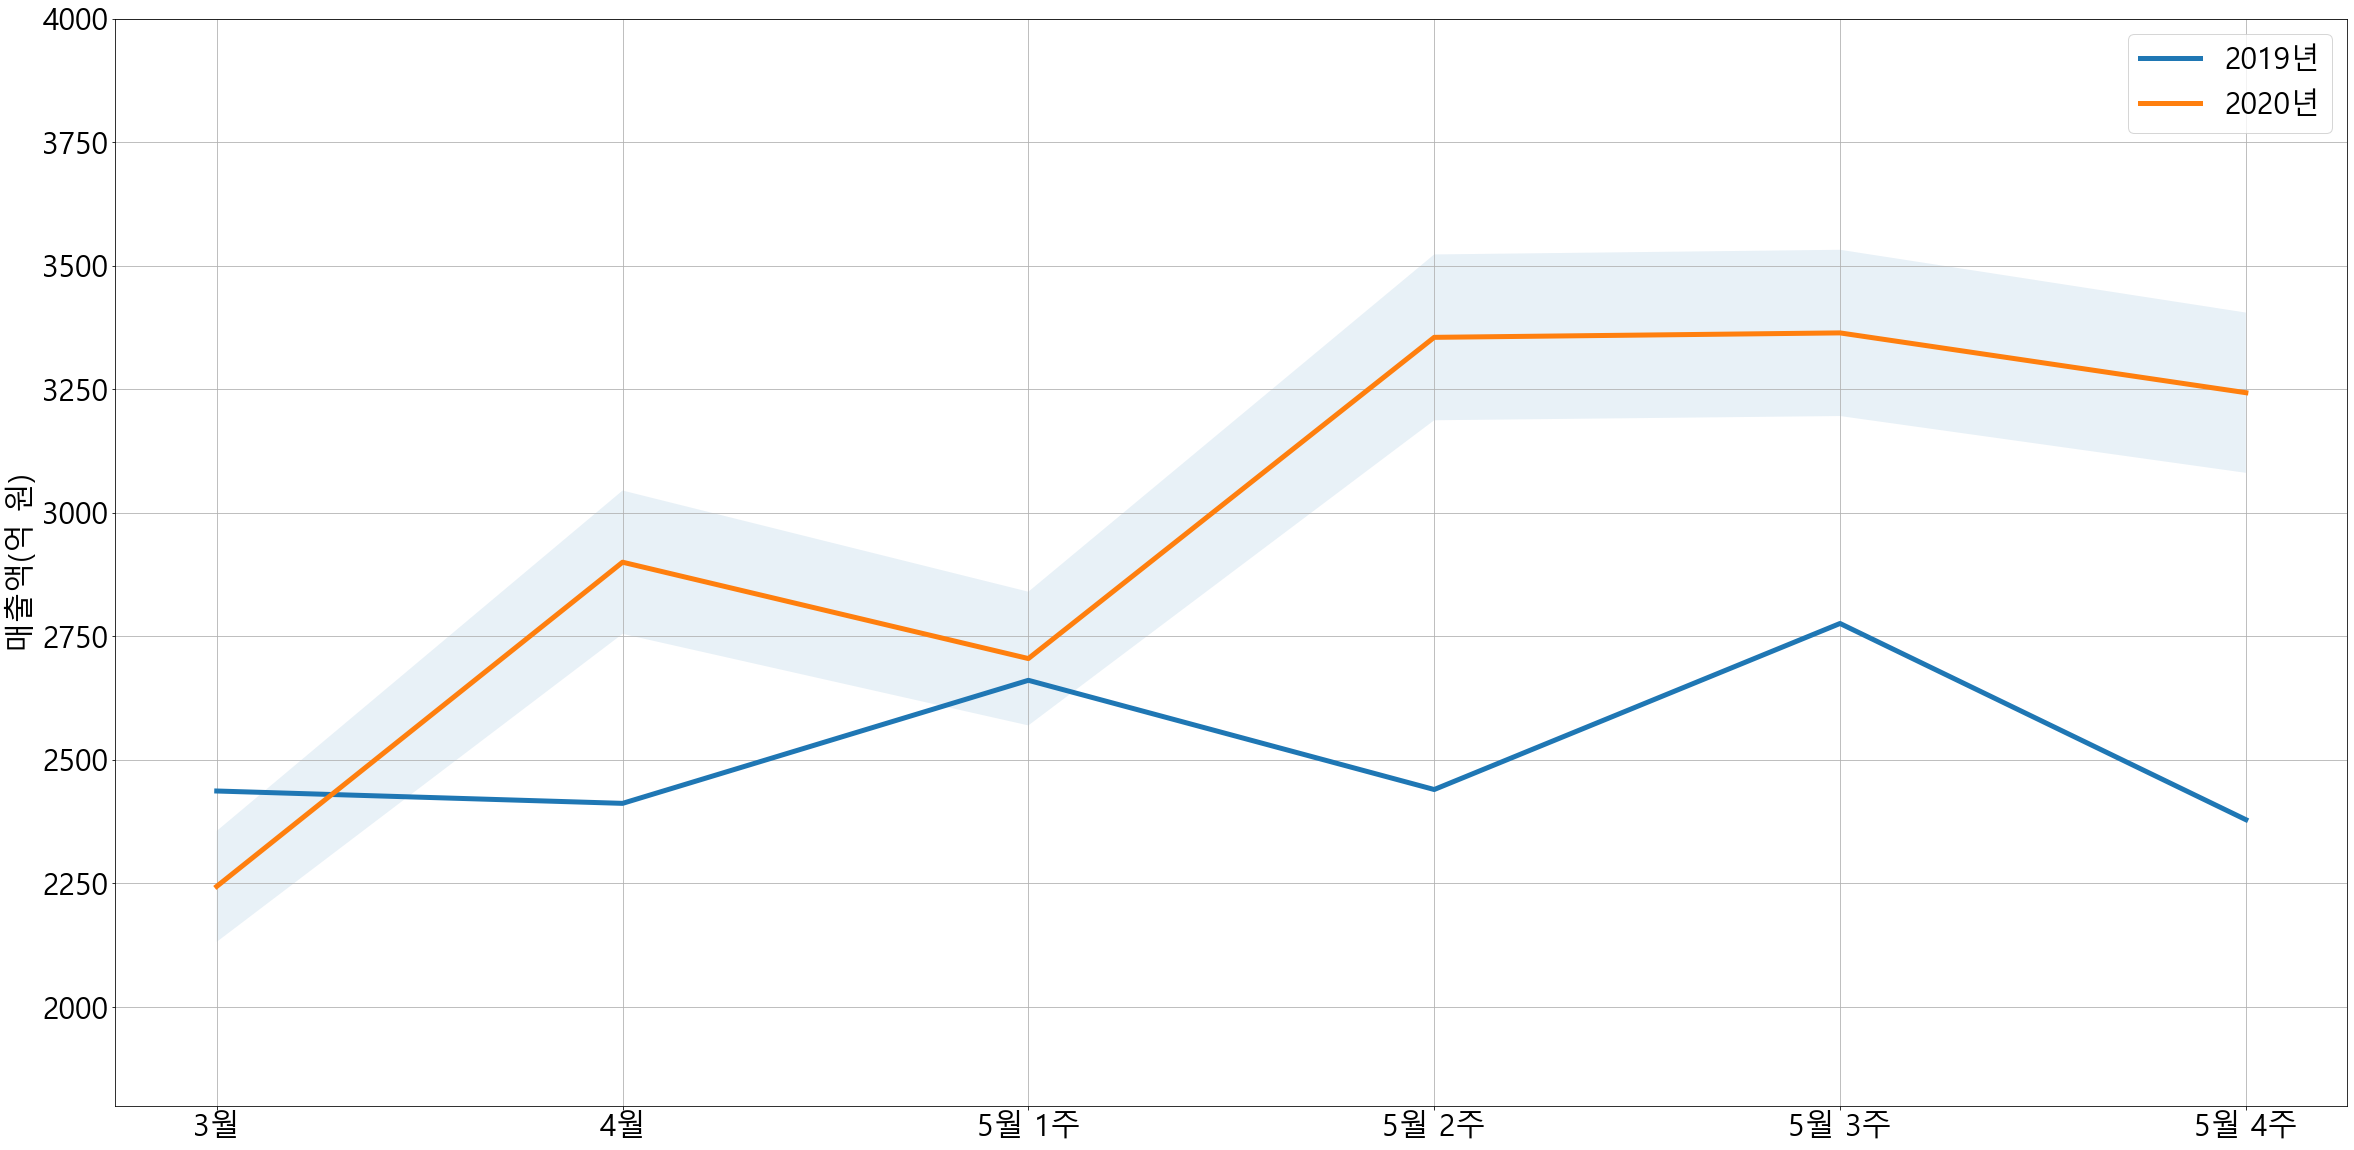

In [22]:
plt.plot(df_card["period"], df_card['2019'], label='2019년', linewidth=5)
plt.plot(df_card["period"], df_card['2020'], label='2020년', linewidth=5)
plt.rcParams["font.size"]=30
plt.rcParams['font.family'] = "Malgun Gothic"
plt.grid()
plt.legend()
plt.ylim([1800, 4000])
plt.ylabel('매출액(억 원)')
y_lower = [i*0.95 for i in df_card['2020']]
y_upper = [i*1.05 for i in df_card['2020']]
plt.fill_between(range(len(df_card)), y_lower, y_upper, alpha=0.1)

In [41]:
subsales = pd.read_csv("subsales.csv", encoding = "cp949")
subsales

,기간,대중음식점,의류,여가레저
0,1월말,17773,2303,3471
1,2월말,13191,1528,3046
2,3월말,15680,2083,3462
3,4월말,20841,3175,4225
4,5월 1주,21088,3206,3932
5,5월 2주,20260,3399,3964
6,5월 3주,21220,3907,4390
7,5월 4주,20825,3704,4916


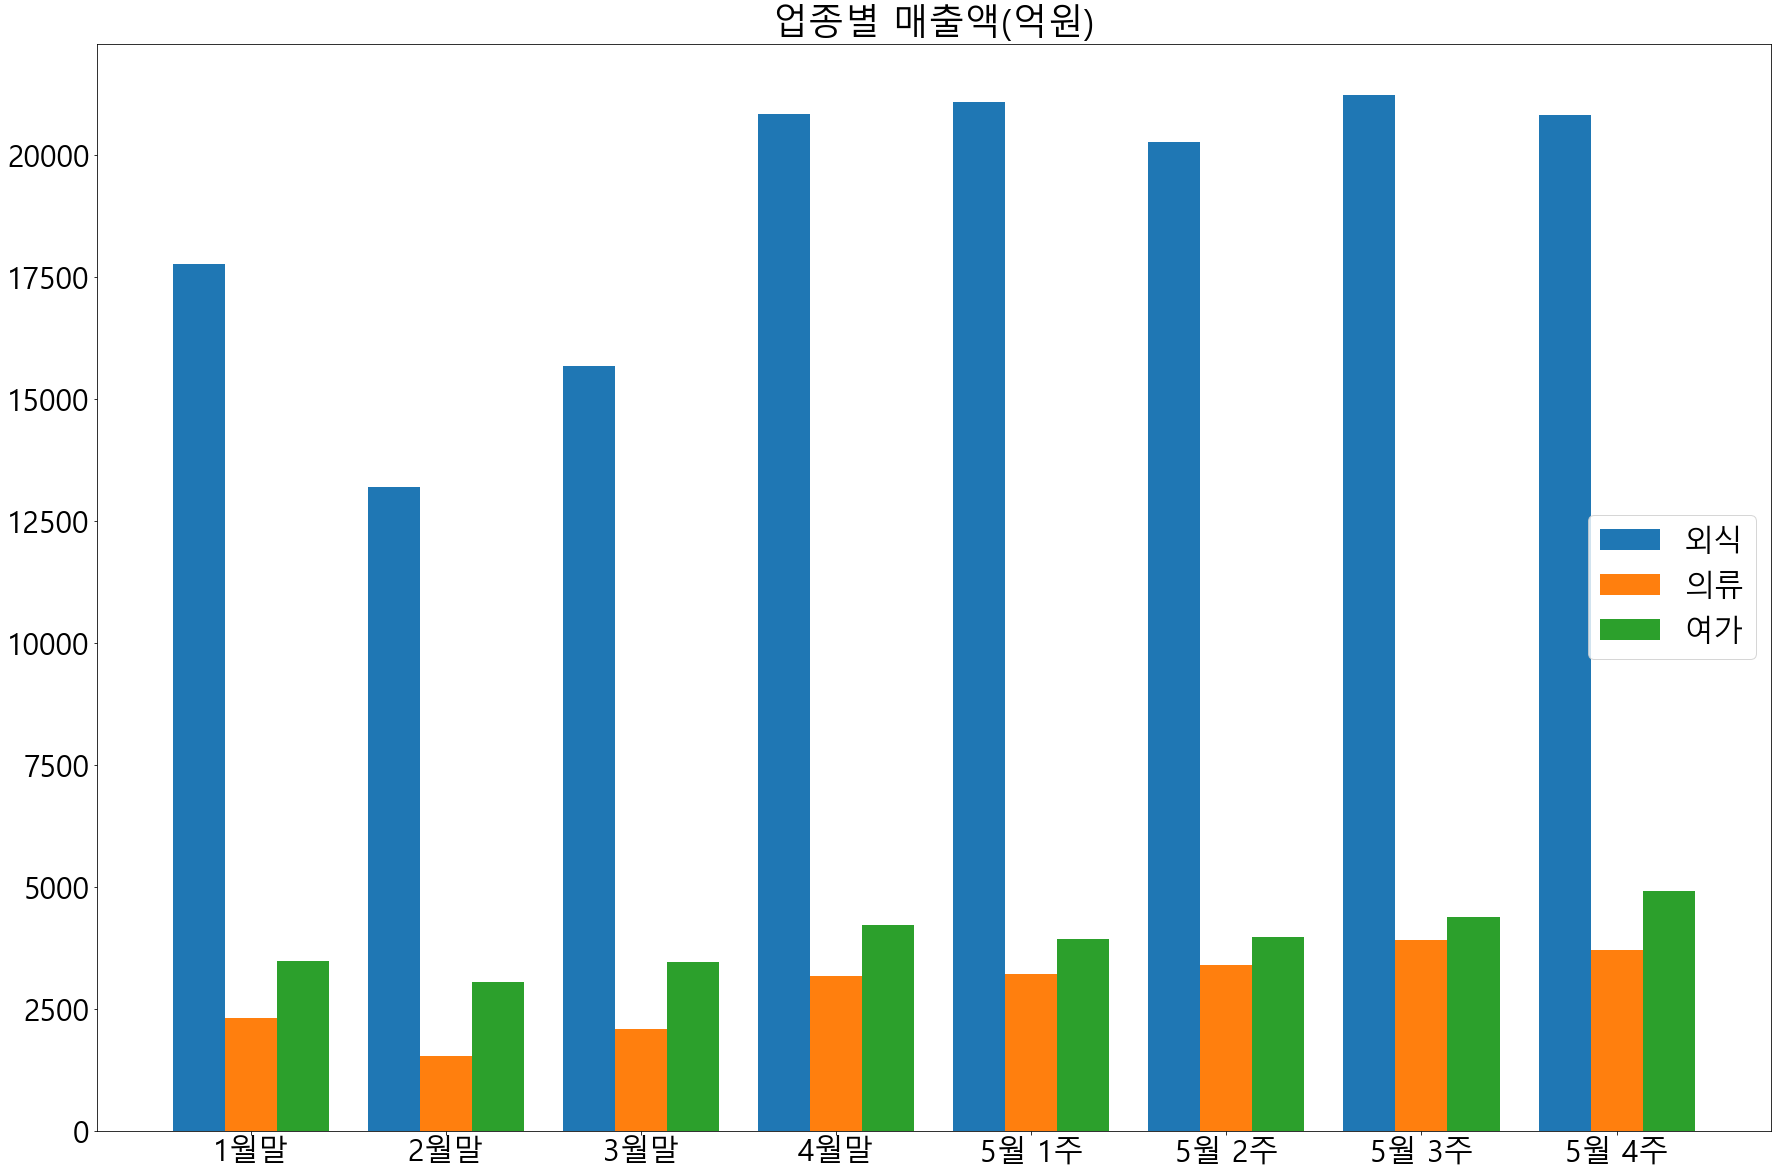

In [49]:
t = 3 # Number of dataset
d = 8 # Number of sets of bars
w = 0.8 # Width of each bar
store_x = []
cols = ['대중음식점','의류','여가레저']
labels = ['외식','의류','여가']
for i in range(1,4):
    store_x.append([t*element + w*i for element in range(d)])
ax = plt.subplot()
for i in range(3):
    ax.bar(store_x[i], subsales[cols[i]], label=labels[i])
middle_x = [(a+b+c)/3 for (a,b,c) in zip(store_x[0], store_x[1], store_x[2])]
ax.legend(loc='center right')
ax.set_xticks(middle_x)
ax.set_xticklabels(subsales['기간'])
plt.title("업종별 매출액(억원)")
plt.show()

In [23]:
suji = pd.read_csv("통합재정수지.csv", encoding = "cp949")
suji = suji.T

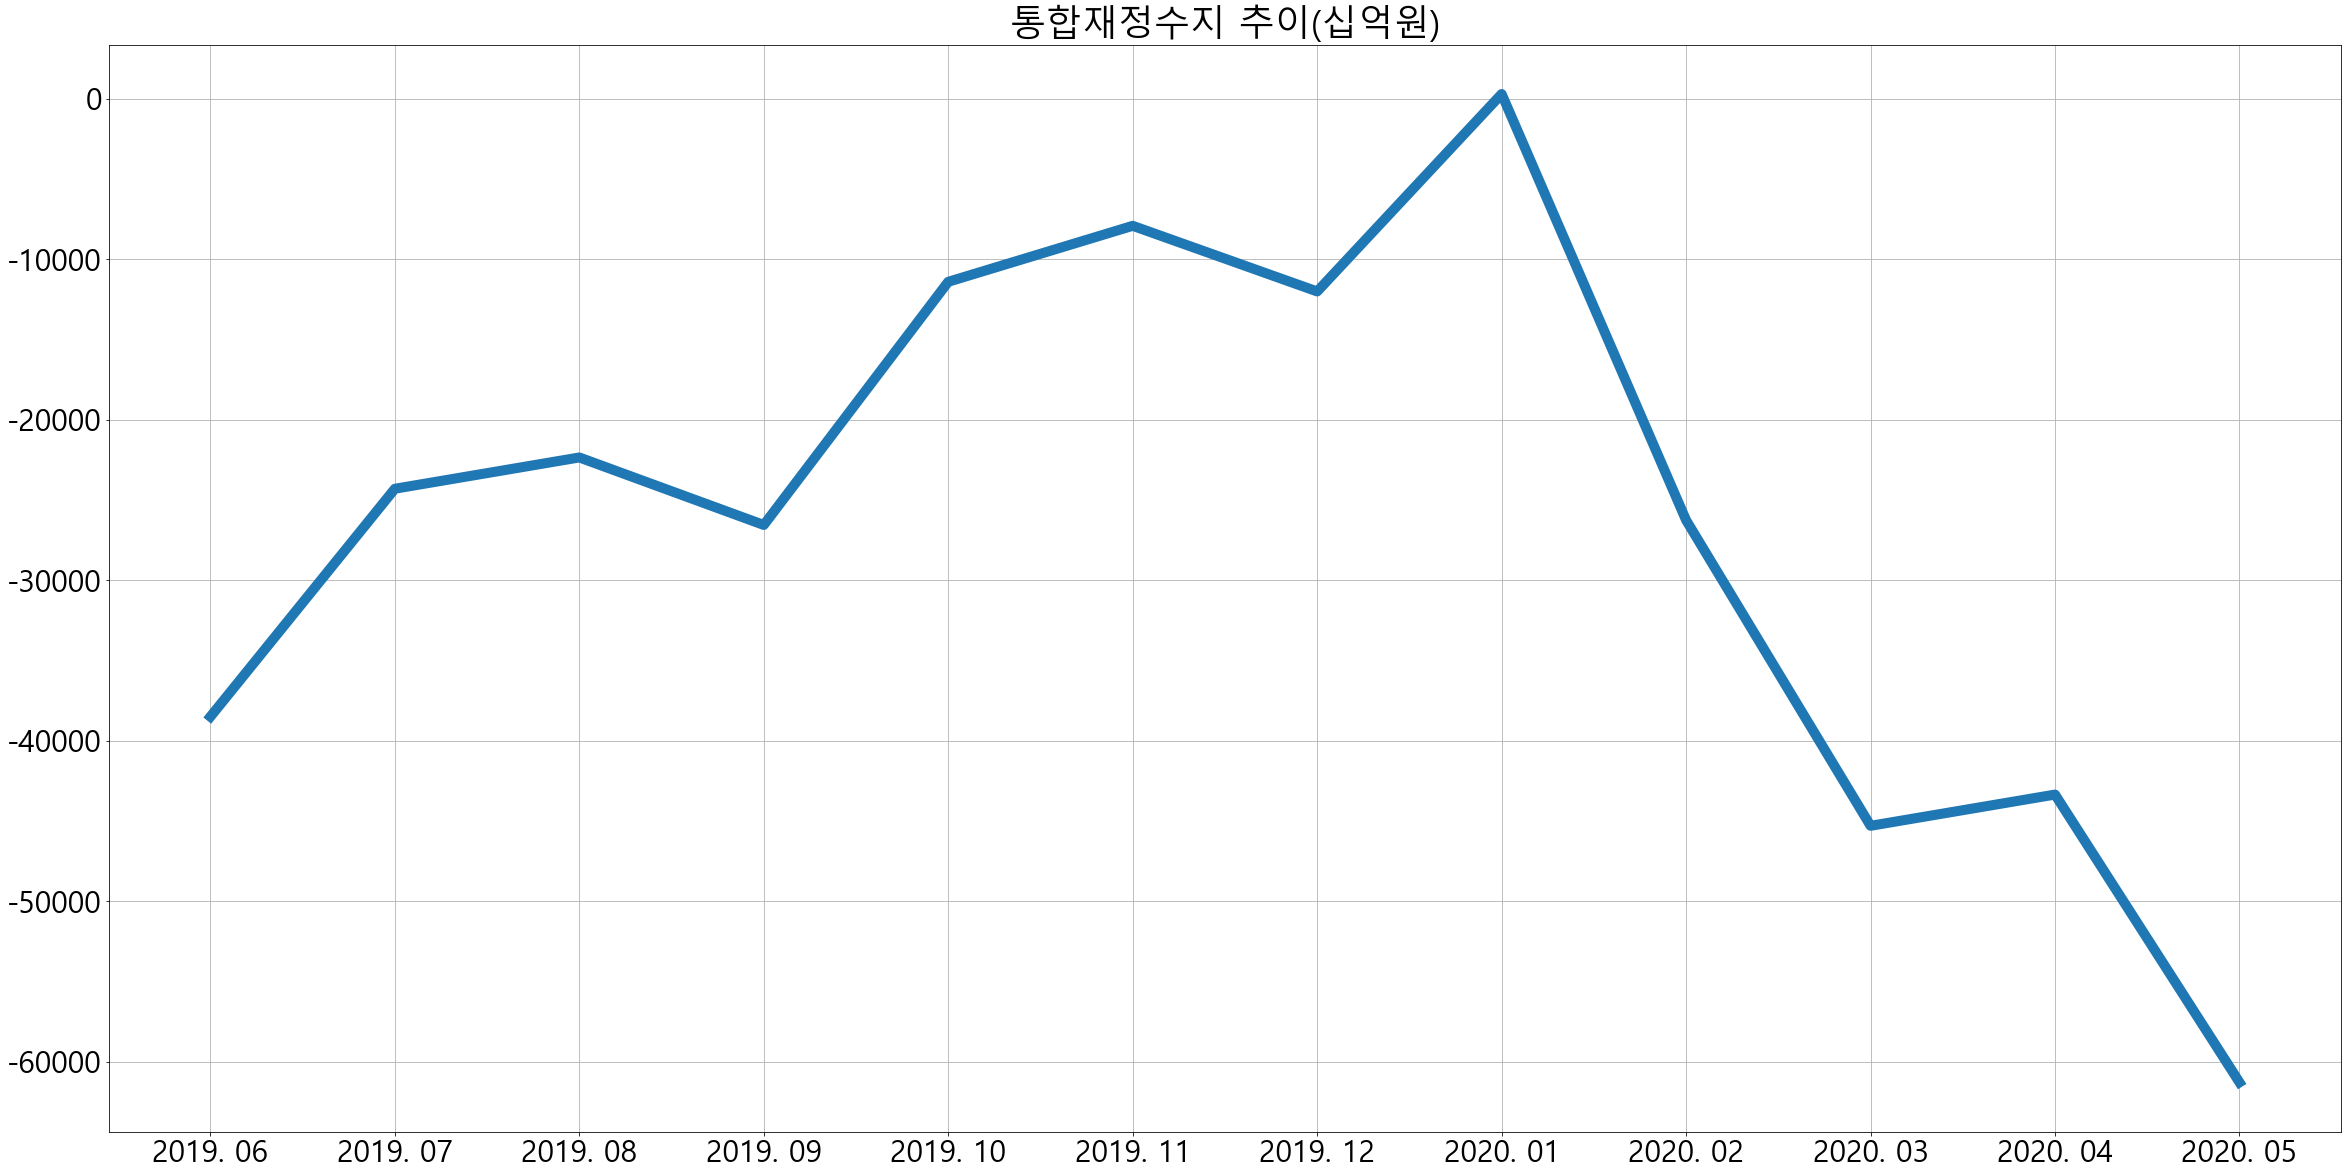

In [25]:
plt.plot(suji.index, suji[0], linewidth = 10)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({"font.size" : 30})
plt.grid()
plt.rcParams["figure.figsize"] = (30, 20)
plt.rcParams['font.family'] = "Malgun Gothic"
plt.title("통합재정수지 추이(십억원)")
plt.show()